In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pip

In [3]:
Customer_Demo = pd.read_excel('CustomerDemographics.xlsx')
Customer_Behavior_Data =  pd.read_excel('CustomerBehaviorData.xlsx')
Credit_Consumption_Data = pd.read_excel('CreditConsumptionData.xlsx')

In [4]:
# Get metadata using info() method
print("DataFrame info:")
print(Customer_Demo.info())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB
None


In [5]:
# Get summary statistics using describe() method
print("DataFrame summary statistics:")
print(Customer_Demo.describe())

DataFrame summary statistics:
                 ID           age  Emp_Tenure_Years  Tenure_with_Bank  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean    9999.500000     47.672300         15.217250          5.496050   
std     5773.647028     30.359771         20.481455          2.870452   
min        0.000000     25.000000          0.500000          1.000000   
25%     4999.750000     33.000000          5.100000          3.000000   
50%     9999.500000     40.000000          9.900000          6.000000   
75%    14999.250000     53.000000         18.000000          8.000000   
max    19999.000000    223.000000        203.000000         10.000000   

        region_code  NetBanking_Flag  Avg_days_between_transaction  
count  19999.000000     20000.000000                  19997.000000  
mean     598.959348         0.718000                     11.044757  
std      220.105230         0.449985                      5.480552  
min      123.000000         0.000000

In [6]:
# Get metadata using info() method
print("DataFrame info:")
print(Customer_Behavior_Data.info())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null 

In [7]:
# Get summary statistics using describe() method
print("DataFrame summary statistics:")
print(Customer_Behavior_Data.describe())

DataFrame summary statistics:
                 ID    cc_cons_apr    dc_cons_apr   cc_cons_may  \
count  20000.000000   20000.000000   20000.000000  1.999900e+04   
mean    9999.500000   17856.990922    8130.453414  1.618836e+04   
std     5773.647028   25158.878234   14572.188829  2.651068e+04   
min        0.000000     253.000000      19.350000  1.570000e+02   
25%     4999.750000    4377.000000    1624.650000  3.635910e+03   
50%     9999.500000   10214.642500    3964.750000  8.635230e+03   
75%    14999.250000   21189.000000    9339.020000  1.865531e+04   
max    19999.000000  441031.330000  229255.000000  1.117246e+06   

         dc_cons_may    cc_cons_jun    dc_cons_jun  cc_count_apr  \
count   20000.000000   20000.000000   19999.000000  19999.000000   
mean     7702.427191   12135.806021    7109.708341     41.611631   
std     17892.731800   18790.984789   13313.935609     97.835475   
min        22.000000      65.000000      62.000000      1.000000   
25%      1634.260000    29

In [8]:
Credit_Consumption_Data

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [9]:
# Get metadata using info() method
print("DataFrame info:")
print(Credit_Consumption_Data.info())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB
None


In [10]:
# Get summary statistics using describe() method
print("DataFrame summary statistics:")
print(Credit_Consumption_Data.describe())

DataFrame summary statistics:
                 ID        cc_cons
count  20000.000000   15000.000000
mean    9999.500000   55157.729867
std     5773.647028   97670.972252
min        0.000000       0.000000
25%     4999.750000    6768.000000
50%     9999.500000   13364.000000
75%    14999.250000   20105.750000
max    19999.000000  408382.000000


In [11]:
# Perform the merge
merged_table = pd.merge(Customer_Demo, Customer_Behavior_Data,on='ID')
merged_table = pd.merge(merged_table, Credit_Consumption_Data, on='ID')

In [12]:
merged_table

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [13]:
# Get metadata using info() method
print("DataFrame info:")
merged_table.info()

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   19999 non-null

In [14]:
# Get summary statistics using describe() method
print("DataFrame summary statistics:")
merged_table.describe()

DataFrame summary statistics:


,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,20000.000000,20000.000000,20000.000000,20000.000000,19999.000000,20000.000000,19997.000000,20000.000000,20000.000000,1.999900e+04,...,20000.00000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,1.999900e+04,15000.000000
mean,9999.500000,47.672300,15.217250,5.496050,598.959348,0.718000,11.044757,17856.990922,8130.453414,1.618836e+04,...,11.91900,40.974850,5.820799e+04,7.812280e+04,7.881693e+04,19.905450,44.529100,5.284985e+04,1.539887e+04,55157.729867
std,5773.647028,30.359771,20.481455,2.870452,220.105230,0.449985,5.480552,25158.878234,14572.188829,2.651068e+04,...,16.85576,40.561202,2.085914e+05,2.448983e+05,1.569872e+05,27.055323,35.080453,1.343175e+05,1.202541e+05,97670.972252
min,0.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,...,0.00000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,4999.750000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4377.000000,1624.650000,3.635910e+03,...,2.00000,11.000000,2.020225e+04,2.576311e+04,2.492008e+04,4.000000,12.000000,1.896450e+04,1.545940e+03,6768.000000
50%,9999.500000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10214.642500,3964.750000,8.635230e+03,...,4.00000,23.000000,3.149650e+04,4.572505e+04,4.618300e+04,7.000000,37.000000,3.025000e+04,3.934660e+03,13364.000000
75%,14999.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,21189.000000,9339.020000,1.865531e+04,...,11.00000,69.000000,5.642100e+04,8.529653e+04,8.602000e+04,21.000000,73.000000,5.344900e+04,9.376390e+03,20105.750000
max,19999.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,441031.330000,229255.000000,1.117246e+06,...,71.00000,171.000000,1.000000e+07,2.642915e+07,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000


In [15]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [16]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], 
                                 prefix = colname, 
                                 drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### EDA

In [17]:
#check for null value
merged_table.isnull().any().sum()

14

In [18]:
mis_val_col =['account_type' , 'gender' , 'Income' , 'region_code', 'Avg_days_between_transaction', 
'cc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'personal_loan_closed', 'investment_3',
'debit_count_apr', 'loan_enq', 'emi_active']

In [19]:
merged_table[mis_val_col].isnull().any().sum()

13

In [20]:
# drop rows where the values are null
# merged_table = merged_table.dropna(subset=mis_val_col)

In [21]:
#check for null value
merged_table.isnull().any().sum()

14

In [22]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   19999 non-null  float64
 13  d

In [23]:
# merged_table.to_excel('output.xlsx', index=False)

In [24]:
merged_table[mis_val_col]

,account_type,gender,Income,region_code,Avg_days_between_transaction,cc_cons_may,dc_cons_jun,cc_count_apr,personal_loan_closed,investment_3,debit_count_apr,loan_enq,emi_active
0,current,M,MEDIUM,628.0,5.0,9553.00,3124.00,8.0,1.0,80000.0,63.0,Y,2646.72
1,current,M,MEDIUM,656.0,12.0,7386.49,6738.00,19.0,1.0,28912.0,10.0,Y,5469.79
2,current,F,MEDIUM,314.0,13.0,4170.53,3778.00,12.0,1.0,1036.0,55.0,Y,7207.85
3,current,M,MEDIUM,614.0,19.0,5261.00,293.00,24.0,1.0,678.0,32.0,Y,591.34
4,current,M,HIGH,750.0,18.0,19193.13,4933.00,100.0,1.0,12000.0,67.0,Y,2621.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,current,F,MEDIUM,354.0,7.0,69121.74,828.04,5.0,1.0,51520.0,29.0,Y,6334.20
19996,current,M,MEDIUM,809.0,14.0,4269.27,5299.00,1.0,1.0,15477.0,5.0,Y,102216.02
19997,current,F,MEDIUM,466.0,10.0,11019.00,83247.00,6.0,1.0,13873.0,11.0,Y,1930.19
19998,current,M,LOW,619.0,17.0,2650.08,11827.46,5.0,1.0,3975.0,5.0,Y,24499.91


In [25]:
miss_int_col=['region_code', 'Avg_days_between_transaction' ,'cc_cons_may', 
              'dc_cons_jun', 'cc_count_apr', 'personal_loan_closed', 'investment_3',
              'debit_count_apr', 'emi_active' ]
miss_obj_col=['account_type', 'gender', 'Income','loan_enq']

In [26]:
for i in miss_int_col:
    merged_table[i] = np.where(pd.isnull(merged_table[i]), 
                               merged_table[i].mean(),
                               merged_table[i])
for j in miss_obj_col:
    merged_table[j] = np.where(pd.isnull(merged_table[j]), 
                               merged_table[j].mode().values[0],
                               merged_table[j])

In [27]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  20000 non-null  object 
 2   gender                        20000 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        20000 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   20000 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  20000 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   20000 non-null  float64
 13  d

In [28]:
num_col = merged_table.select_dtypes(include=['int','float']).columns

### One hot encoding

In [29]:
obj_var = merged_table.select_dtypes(include=['object']).columns
obj_var

Index(['account_type', 'gender', 'Income', 'loan_enq'], dtype='object')

In [30]:
merged_table['account_type'].value_counts()

current    16926
saving      3074
Name: account_type, dtype: int64

In [31]:
merged_table['gender'].value_counts()

M    17288
F     2712
Name: gender, dtype: int64

In [32]:
merged_table['Income'].value_counts()

MEDIUM    12775
LOW        5612
HIGH       1613
Name: Income, dtype: int64

In [33]:
merged_table['loan_enq'].value_counts()

Y    20000
Name: loan_enq, dtype: int64

In [34]:
# lets drop loan_enq as its cardinality is lowest
# and lets drop ID as its cardinality is very very high
merged_table.drop(columns=['ID','loan_enq'] , inplace=True)

In [35]:
merged_table.shape

(20000, 47)

In [36]:
merged_table = create_dummies(merged_table,['account_type','gender','Income'])

In [37]:
merged_table.shape

(20000, 48)

#### Outlier treatment

In [38]:
# separate the numeric and object variables
num_var = merged_table.select_dtypes(['float64', 'int64'])

In [39]:
# get the data audit report for all the variables
num_var.apply(continuous_var_summary)

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,...,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64
cardinality,43,270,10,211,2,20,8459,3861,8505,4053,...,31,57,5299,8632,8311,39,66,5833,5941,12260
n_tot,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
n,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000,20000,20000,20000,15000
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5000
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
sum,953446,304345.0,109921,11979186.959348,14360,220895.13427,357139818.44,162609068.27,323767294.334717,154048543.82,...,238380,819497,1164159702.76,1562455943.19,1576338552.15,398109,890582,1056996951.42,307977375.468773,827365948.0
mean,47.6723,15.21725,5.49605,598.959348,0.718,11.044757,17856.990922,8130.453414,16188.364717,7702.427191,...,11.919,40.97485,58207.985138,78122.79716,78816.927607,19.90545,44.5291,52849.847571,15398.868773,55157.729867
std,30.359771,20.481455,2.870452,220.099727,0.449985,5.480141,25158.878234,14572.188829,26510.018788,17892.7318,...,16.85576,40.561202,208591.362703,244898.308732,156987.241764,27.055323,35.080453,134317.525107,120251.069229,97670.972252
var,921.715698,419.489979,8.239496,48443.889692,0.202486,30.031949,632969153.988079,212348687.260089,702781096.121192,320149851.281652,...,284.116645,1645.211078,43510356594.345634,59975181619.710663,24644994076.810459,731.99051,1230.638185,18041197550.945358,14460319650.712879,9539618820.721489


In [40]:
num_var

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,63,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72,NaN
1,36,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79,NaN
2,28,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85,NaN
3,32,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,591.34,NaN
4,32,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,66,32.2,6,354.0,1,7.0,4611.00,12015.50,69121.74,550.50,...,0,8,24438.0,153772.21,31284.00,3,38,42872.0,6334.20,NaN
19996,53,19.8,5,809.0,0,14.0,9545.00,2061.00,4269.27,901.00,...,47,11,213000.0,18098.47,93108.00,43,11,36747.0,102216.02,NaN
19997,66,18.4,1,466.0,0,10.0,2028.93,9454.99,11019.00,4774.50,...,2,171,34327.0,32198.63,46800.00,3,38,18810.0,1930.19,NaN
19998,32,6.0,8,619.0,0,17.0,11456.23,3999.00,2650.08,290.00,...,3,82,51929.0,27334.14,20201.00,47,80,11443.0,24499.91,NaN


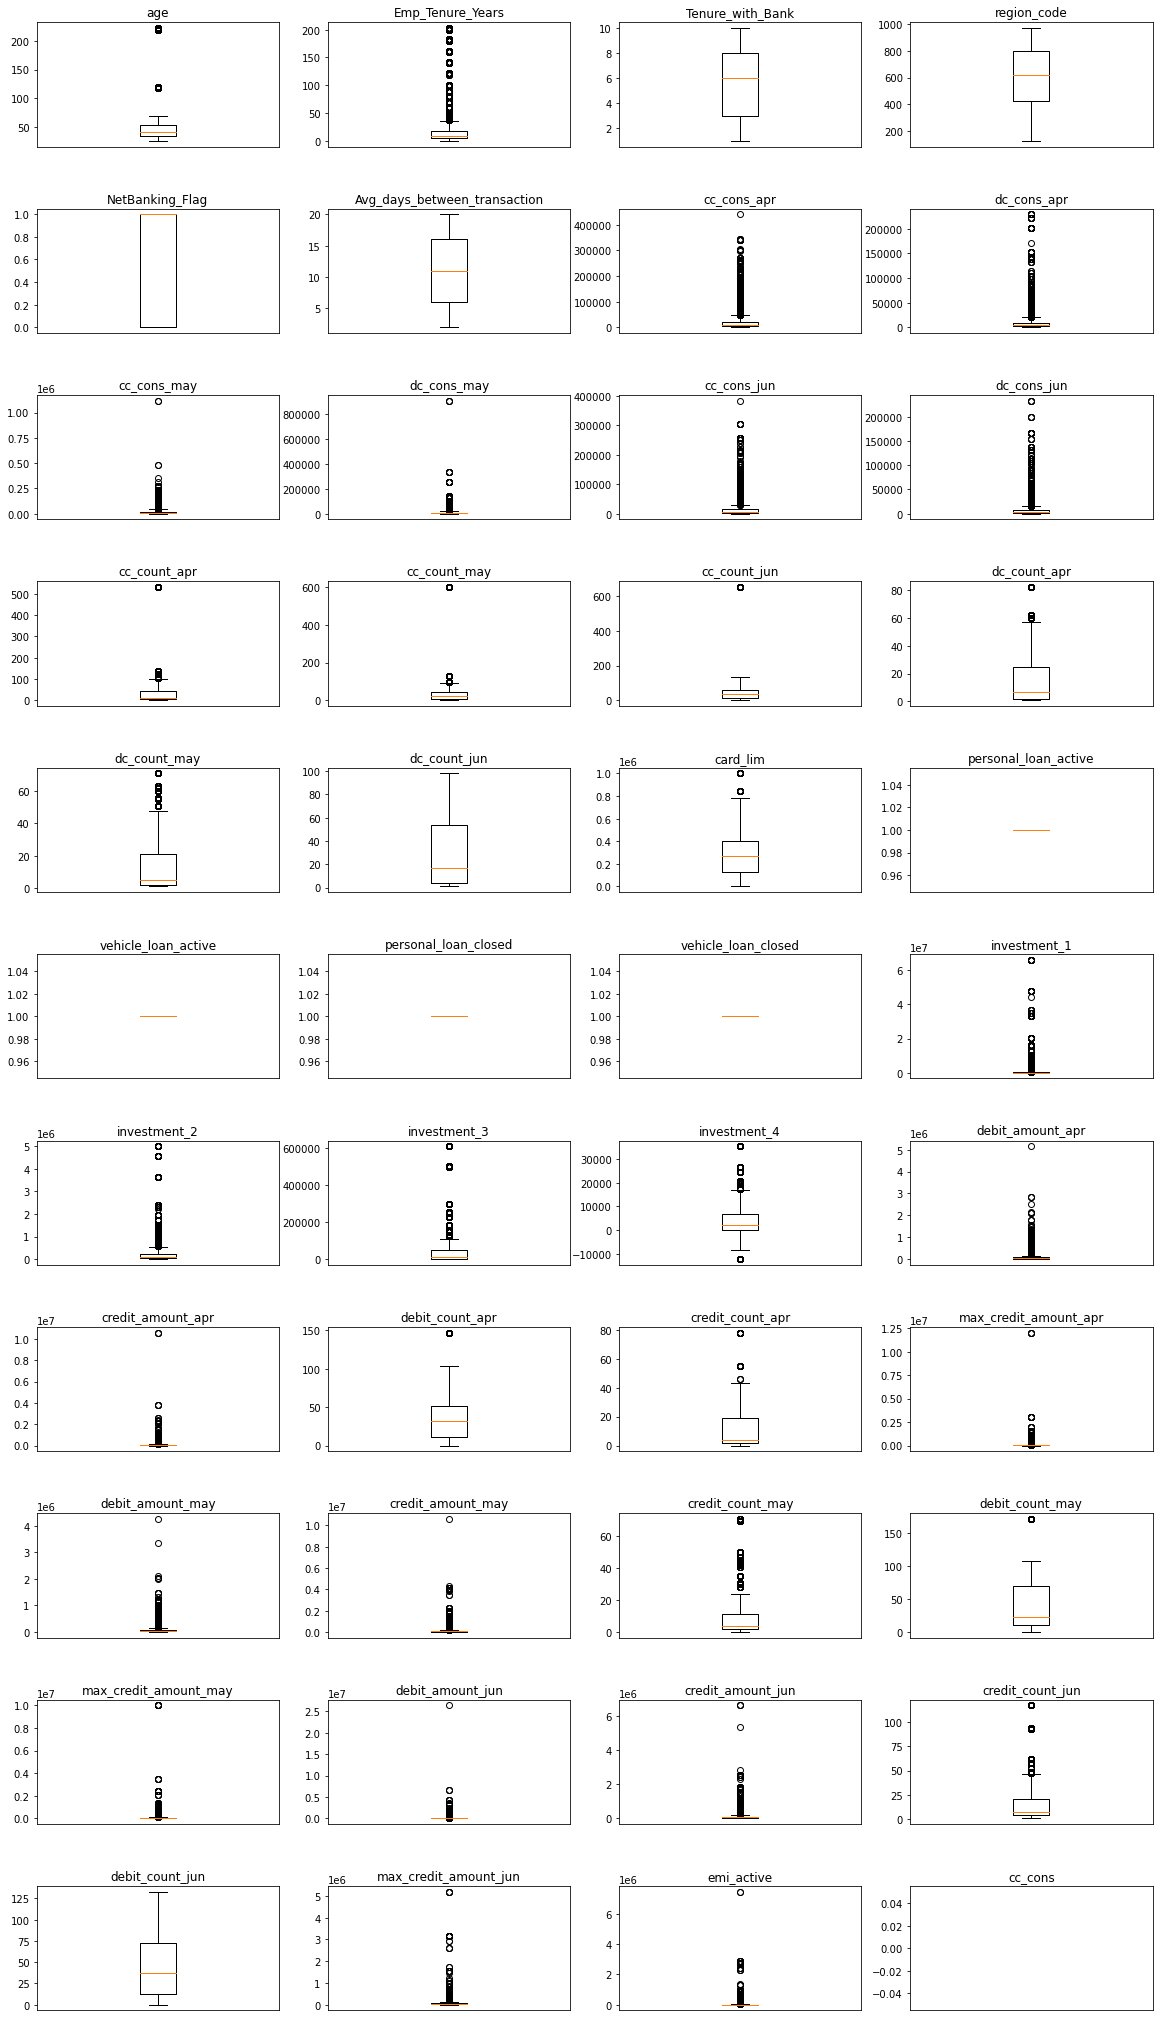

In [41]:
# Determine the number of rows and columns for the subplot grid
num_rows = 12
num_cols = 4

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(num_var.columns):
    # Select the corresponding axis for the current box plot
    ax = axes[i]
    
    # Create the box plot for the current column
    ax.boxplot(num_var[column])
    
    # Set the title of the box plot to the column name
    ax.set_title(column)
    
    # Remove x-axis ticks and labels for better visualization
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    # Adjust the subplot spacing
    fig.subplots_adjust(hspace=0.5)
    
# Remove any extra subplots if the number of columns is not divisible by the number of rows
if len(num_var.columns) < num_rows * num_cols:
    for j in range(len(num_var.columns), num_rows * num_cols):
        fig.delaxes(axes[j])

# Display the plot
plt.show()


In [42]:
# maximum age cannot be more than 100
merged_table.age.max()

223

In [43]:
merged_table.age.quantile(0.99)

222.0

In [44]:
# clealy there are many attributes which require outlier treatment

outl_col= ['age', 'Emp_Tenure_Years', 'cc_cons_apr','dc_cons_apr', 
          'cc_cons_may','dc_cons_may','cc_cons_jun','dc_cons_jun','cc_count_apr', 
          'cc_count_may','cc_count_jun','dc_count_apr', 'dc_count_may',
          'card_lim','investment_1', 'investment_2','investment_3','investment_4',
          'debit_amount_apr','credit_amount_apr','debit_count_apr',
          'credit_count_apr', 'max_credit_amount_apr','debit_amount_may',
          'credit_amount_may','credit_count_may','debit_count_may',
          'max_credit_amount_may', 'debit_amount_jun','credit_amount_jun',
          'credit_count_jun','max_credit_amount_jun', 'emi_active']        

In [45]:
# This method is not working as the outliers are more than expected.

#for i in outl_col:
#    merged_table[i].clip(lower = merged_table[i].quantile(0.01),
#                         upper = merged_table[i].quantile(0.99), inplace=True)

In [46]:
# Set the multiplier to adjust the IQR threshold
multiplier = 1.5

# Iterate over each column in the DataFrame
for col in outl_col:
# Calculate the first quartile (Q1) and third quartile (Q3) of the column
    Q1 = merged_table[col].quantile(0.25)
    Q3 = merged_table[col].quantile(0.75)
    
# Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
# Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
# Identify and treat outliers by capping them within the lower and upper bounds
    merged_table[col] = merged_table[col].apply(lambda x: lower_bound if 
                                  x < lower_bound else (upper_bound if 
                                                        x > upper_bound else x))

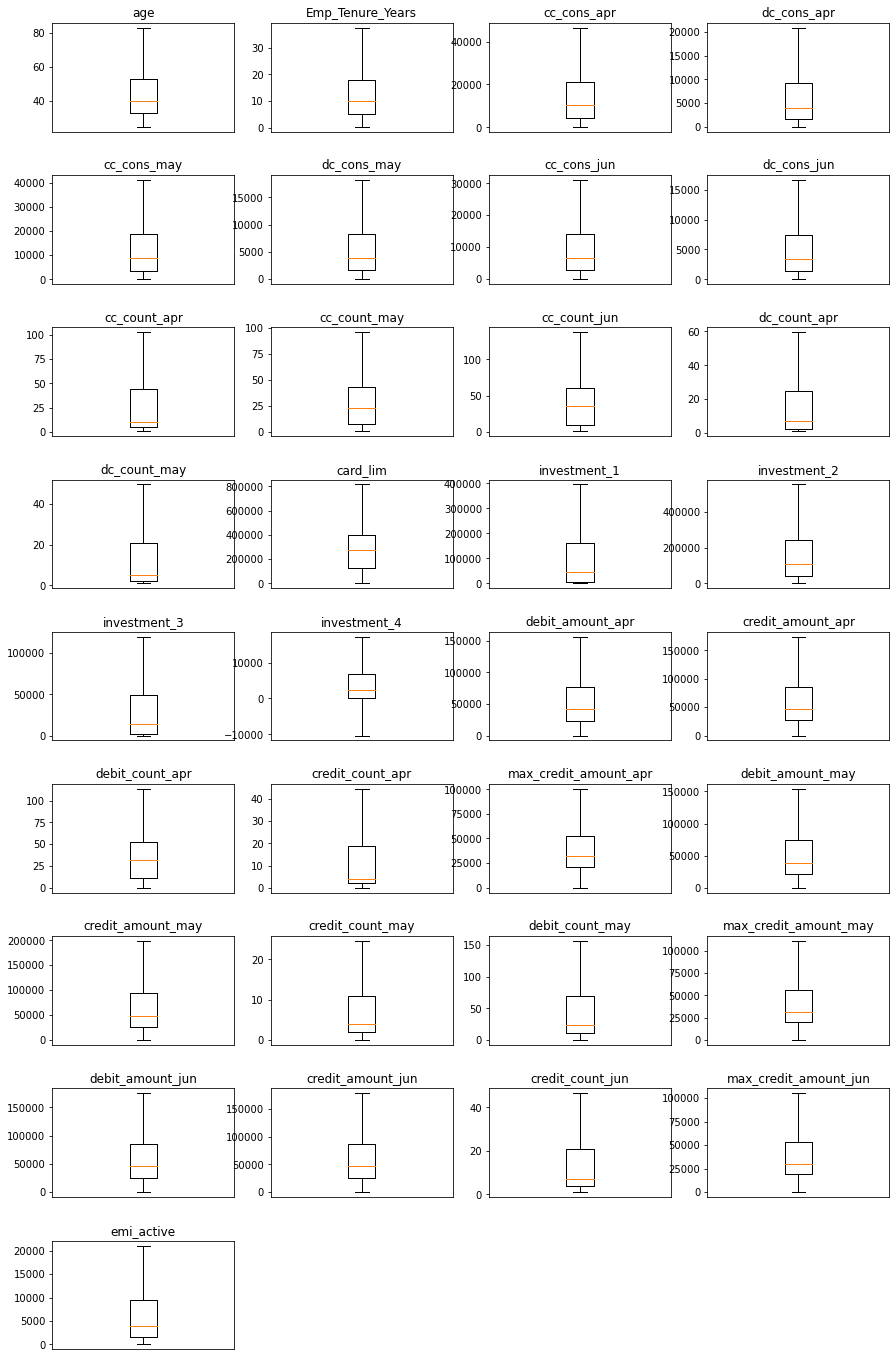

In [47]:
# Create an 11x4 subplot grid
fig, axes = plt.subplots(11, 4, figsize=(15, 30))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(outl_col):
    # Select the corresponding axis for the current box plot
    ax = axes[i]
    
    # Create the box plot for the current column
    ax.boxplot(merged_table[column])
    
    # Set the title of the box plot to the column name
    ax.set_title(column)
    
    # Remove x-axis ticks and labels for better visualization
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    # Adjust the subplot spacing
    fig.subplots_adjust(hspace=0.4)
    
# Remove any extra subplots if the number of columns is not divisible by 4
if len(outl_col) < 44:
    for j in range(len(outl_col), 44):
        fig.delaxes(axes[j])

# Display the plot
plt.show()


#### Now lets do the feature selection using Ridge and Lasso regression

In [48]:
merged_table.columns

Index(['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons', 'account_type_saving',
       'gender_M', 'Income_LOW', 'Income_MEDIUM'],
      dtype='object')

In [49]:
merged_table

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,63.0,30.10,10,628.0,1,5.0,7998.48,2289.000,9553.00000,2879.580,...,177669.88,40.0,96,46088.0,2646.720,NaN,0,1,0,1
1,36.0,14.40,10,656.0,0,12.0,16479.64,415.000,7386.49000,6763.000,...,177669.88,7.0,12,17953.0,5469.790,NaN,0,1,0,1
2,28.0,4.80,10,314.0,1,13.0,29272.03,20910.575,4170.53000,18207.585,...,35467.00,16.0,42,41121.0,7207.850,NaN,0,0,0,1
3,32.0,9.60,2,614.0,1,19.0,9662.31,5306.390,5261.00000,11934.790,...,87204.35,2.0,10,32003.0,591.340,NaN,0,1,0,1
4,32.0,12.00,7,750.0,1,18.0,13239.86,7063.000,19193.13000,18207.585,...,83992.00,21.0,12,9626.0,2621.390,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,66.0,32.20,6,354.0,1,7.0,4611.00,12015.500,41162.76625,550.500,...,31284.00,3.0,38,42872.0,6334.200,NaN,0,0,0,1
19996,53.0,19.80,5,809.0,0,14.0,9545.00,2061.000,4269.27000,901.000,...,93108.00,43.0,11,36747.0,21122.065,NaN,0,1,0,1
19997,66.0,18.40,1,466.0,0,10.0,2028.93,9454.990,11019.00000,4774.500,...,46800.00,3.0,38,18810.0,1930.190,NaN,0,0,0,1
19998,32.0,6.00,8,619.0,0,17.0,11456.23,3999.000,2650.08000,290.000,...,20201.00,46.5,80,11443.0,21122.065,NaN,0,1,1,0


In [50]:
# load the ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [51]:
merged_table['cc_cons'].isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
19995    True
19996    True
19997    True
19998    True
19999    True
Name: cc_cons, Length: 20000, dtype: bool

In [52]:
Non_null_df = merged_table[~merged_table['cc_cons'].isnull()]
validation_df= merged_table[merged_table['cc_cons'].isnull()]

In [53]:
y = Non_null_df.loc[:, Non_null_df.columns == 'cc_cons']
X = Non_null_df.loc[:, Non_null_df.columns != 'cc_cons']

In [54]:
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
#
## Assuming 'X' is your feature matrix and 'y' is your target variable
#
## Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
## Create the Decision Tree Regressor model
#tree_reg = DecisionTreeRegressor()
#
## Train the model
#tree_reg.fit(X_train, y_train)
#
## Make predictions on the test set
#y_pred = tree_reg.predict(X_test)
#
## Calculate the Mean Squared Error
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

In [55]:
#### Clarly Decision tree regressor is not giving a good MSE 
# so let go with linear regression

In [56]:
# Before linear regression we will do feature reduction using
# using ridge and lasso regression

In [57]:
from sklearn import preprocessing

#scale all column of data, this will give a numpy array
x_scaled = preprocessing.scale(X)
x_scaled = pd.DataFrame(x_scaled, columns= X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns= y.columns)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [59]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


X_train: (10500, 47)
X_test: (4500, 47)
y_train: (10500, 1)
y_test: (4500, 1)
